## O problema

Considere os seguintes dados referentes ao índice de acidez (Y ) e o tempo de armazenamento (X) de óleo de nozes em recipientes de plástico de polipropileno. Temos Y = { 0.17, 0.22, 0.21, 0.24, 0.25, 0.34, 0.35, 0.35, 0.33, 0.37} e X = {0, 30, 45, 60, 75, 90, 105, 120, 135, 150}. Encontre a reta de regressão do presente problema.

In [126]:
# vamos pegar os dados
x <- c(0, 30, 45, 60, 75, 90, 105, 120, 135, 150)
y <- c(0.17, 0.22, 0.21, 0.24, 0.25, 0.34, 0.35, 0.35, 0.33, 0.37)

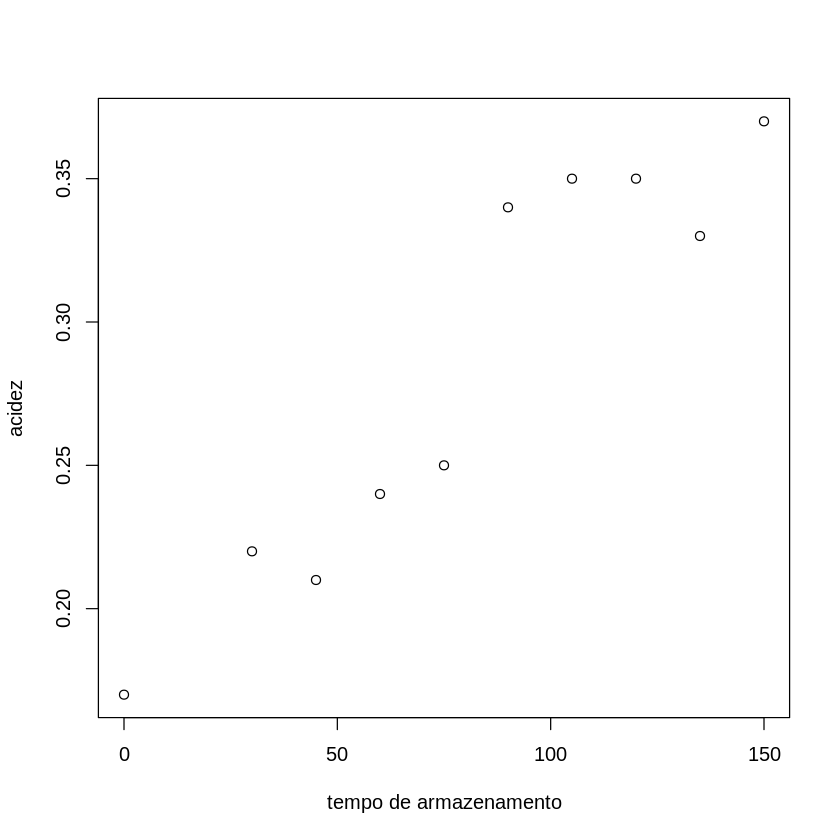

In [127]:
# vamos visualizar os dados
plot (x, y, xlab="tempo de armazenamento", ylab="acidez")

### Observação

Podemos ver que a relação entre as duas variáveis pode ser vista como linear. Vamos continuar com a regressão.

## Estimativa de $\beta_0$ e $\beta_1$

Do material de apoio, temos que os estimadores das variáveis acima são:
$$ b_1 = \hat{\beta_1} = \frac{\sum (X_i - \bar{X}) \, Y_i}{\sum (X_i - \bar{X})^2}$$
e
$$ b_0 = \hat{\beta_0} = \frac{\sum Y_i - b_1 \sum X_i}{n} = \bar{Y} - b_1 \bar{X} $$

In [128]:
####################
### variáveis

# número de pontos
n <- length(x)
# média em x
mx <- mean(x)
# média em y
my <- mean (y)
# (x - mx)
uga <- (x - rep(mx, n))
Sxx <- sum(uga*uga)
#################


### finalmente, calculamos b1 e b0
b1 <- sum(uga*y) / Sxx
b0 <- my - b1 * mx

### feedback ao usuário
cat (paste('b1 = ', b1, '\n'))
cat (paste('b0 = ', b0, '\n'))

b1 =  0.00141269841269841 
b0 =  0.168571428571429 


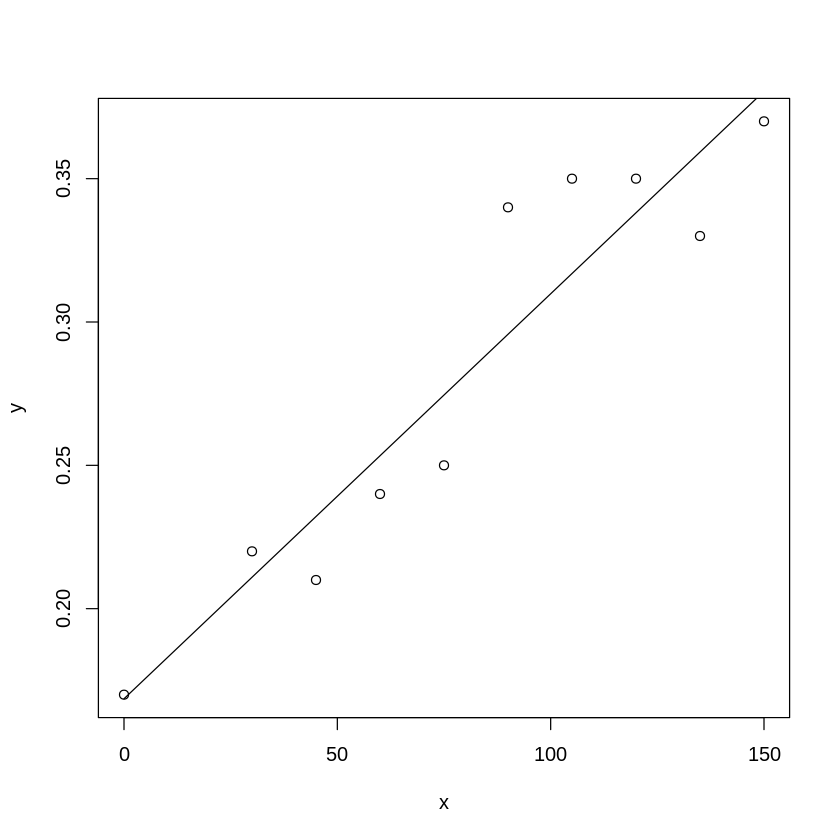

In [130]:
# criando dados para o gráfico da regressão
novoX <- seq(0,150,length.out=500)
novoY <- rep(b0,500)+rep(b1,500)*novoX

plot (x,y)
lines (novoX, novoY)

## Estimativa de $\sigma^2$

Um estimador não viesado de $\sigma^2$ é $S^2$:
$$ S^2 = \frac{1}{n-2} \sum \Big[ Y_i - (\beta_0 + \beta_1 X_i) \Big]^2 = \frac{SQE}{n-2}$$

In [131]:
### 
Snum <- y - (rep(b0, n) + rep(b1,n)*x)
SQE <- sum(Snum**2) 
S2 <- SQE/(n-2)

# feedback
cat (paste('S2 = ', S2, '\n'))
cat (paste('S  = ', sqrt(S2)))

S2 =  0.000689880952380952 
S  =  0.0262655849426765

## Intervalo de Confiança para $\beta_1$ e $\beta_0$


### $\beta_1$

Vimos que:
$$ U = (b_1 - \beta_1) \frac{\sqrt{S_{xx}}}{S} $$
segue uma distribuição $t$-Student com $n - 2$ graus de liberdade.

Um intervalo de confiança de $100(1-\alpha)$\% para o parâmetro $\beta_1$, da regressão linear, é dado por:
$$
\beta_1 = b_1 \pm c_{(\alpha/2)} \sqrt{ \frac{S^2}{S_{XX}}} ,
$$
onde $c_{(\alpha/2)}$ é o valor de $U$ para o qual temos uma área igual a $\alpha/2$ à esquerda deste valor no gráfico da função $t$-Student com $n-2$ graus de liberdade.

In [133]:
### confiança
conf <- 0.95


########## não modificar abaixo
# alfa
alfa <- (1-conf)/2      # 2.5%
# variável t
c <- qt(alfa, df=n-2)
# início do intervalo
beta1a <- b1 + c*sqrt(S2/Sxx)
# fim do intervalo
beta1b <- b1 - c*sqrt(S2/Sxx)
# t
meu_t <- b1/sqrt(S2/Sxx)

# feedback
cat (paste0('intervalo = [ ', beta1a,' : ', beta1b,' ]    com confiança = ', conf*100, '%\n'))
cat (paste0('teste t para beta1 = 0', meu_t, '\n'))
cat (paste0('prob (> |t|) = ', 2*(1-pt(meu_t, df=n-2))))

[1] -2.306004

intervalo = [ 0.000992630107869091 : 0.00183276671752773 ]    com confiança = 95%
teste t para beta1 = 07.75513968568167
prob (> |t|) = 5.45811024981191e-05

### $\beta_0$

Pode-se mostrar que:
$$
U = \frac{(b_0 - \beta_0)}{S \sqrt{\frac{1}{n} + \frac{\bar{X}^2}{S_{xx}}}},
$$
segue uma distribuição $t$-Student com $n - 2$ graus de liberdade.

Podemos criar um intervalo de confiança de $100(1-\alpha)$\% para o parâmetro $\beta_0$ na regressão linear dado por:
$$
\beta_0 = \hat{\beta}_0 \pm c_{(\alpha/2)} \sqrt{ S^2 \left[ \frac{1}{n} + \frac{\bar{X}^2}{S_{xx}} \right] },
$$
onde $c_{\alpha/2}$ é o valor de $U$ para o qual temos uma área igual a $\alpha/2$ à esquerda deste valor no gráfico da função $t$-Student de $n-2$ graus de liberdade.	

In [136]:
### confiança
conf <- 0.95

######## não modificar abaixo #########
alfa <- (1-conf)/2
# variável t
c <- qt(alfa, df=n-2)
# início do intervalo
beta0a <- b0 + c*sqrt(S2*((1/n)+(mx**2/Sxx)))
# fim do intervalo
beta0b <- b0 - c*sqrt(S2*((1/n)+(mx**2/Sxx)))
# t
meu_t <- b0/sqrt(S2*((1/n)+(mx**2/Sxx)))

# feedback
cat (paste0('intervalo = [ ', beta0a,' : ', beta0b,' ]    com confiança = ', conf*100, '%\n'))
cat (paste0('teste t para beta1 = 0', meu_t, '\n'))
cat (paste0('prob (> |t|) = ', 2*(1-pt(meu_t, df=n-2))))

intervalo = [ 0.129525407398463 : 0.207617449744394 ]    com confiança = 95%
teste t para beta1 = 09.95559597842294
prob (> |t|) = 8.77485902872621e-06

## Coeficiente de Determinação $R^2$

- Coeficiente de determinação $R^2$
- Definição:
$$
			R^2 = \frac{SQReg}{STQ} = 1 - \frac{SQE}{STQ}
$$
- temos $SQT = \sum (Y_i - \bar{Y})^2$
- e ainda $SQT = SQE + SQReg$
- SQE: variância que não é devida ao modelo
- SQReg: variância devido ao modelo
- se o modelo é bom $SQE \rightarrow 0$, logo $R^2 \rightarrow 1$
- se o modelo é ruim $SQE \rightarrow 1$, logo $R^2 \rightarrow 0$


In [137]:
SQT <- sum((y - rep(my, n))**2)
SQReg <- SQT - SQE
R2 <- 1 - SQE/SQT

# feedback
cat(paste('SQT = ', SQT, '\n'))
cat(paste('SQE = ', SQE, '\n'))
cat(paste('SQReg = ', SQReg, '\n'))
cat(paste('R2 = ', R2, '\n'))
cat(paste('dist. F = ', SQReg*(n-2)/SQE, ' com 1 e ', n-2 ,' graus de liberdade\n'))
cat(paste('prob. de > F = ', (1-pf (SQReg*(n-2)/SQE, 1, n-2)), '\n'))

SQT =  0.04701 
SQE =  0.00551904761904762 
SQReg =  0.0414909523809524 
R2 =  0.882598433970483 
dist. F =  60.1421915444349  com 1 e  8  graus de liberdade
prob. de > F =  5.45811024982301e-05 


## Resíduos

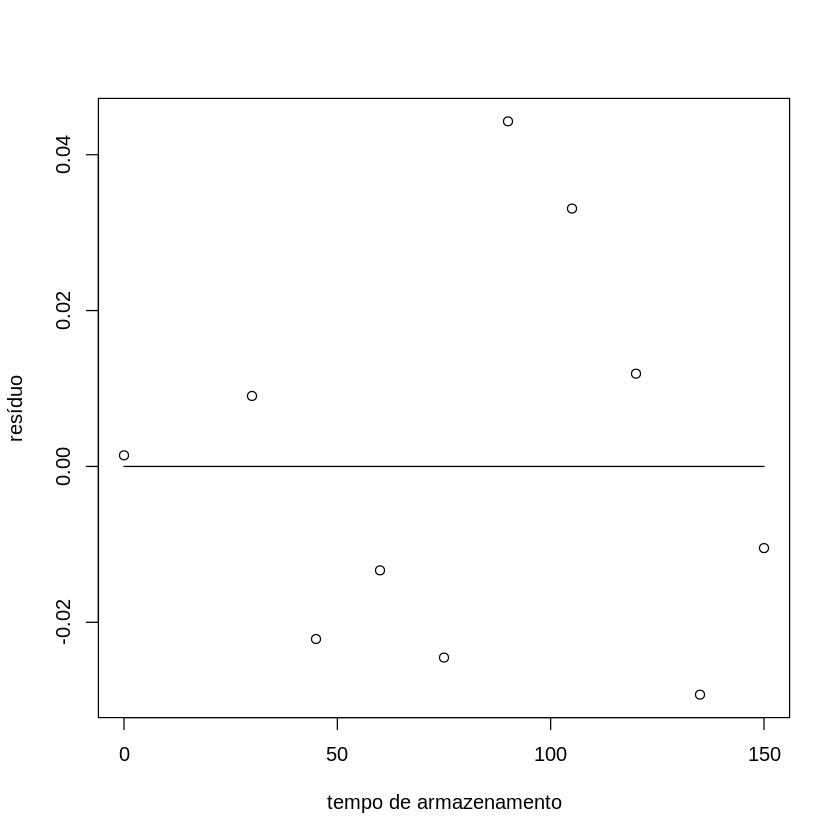

In [94]:
plot (x, y - rep(b0, n) - rep (b1, n) * x, xlab="tempo de armazenamento", ylab="resíduo")
lines (seq(0,150,length.out=500), rep(0,500))

## Intervalo de Confiança para uma nova média

Digamos que estejamos interessados em saber exatamente qual é o valor de média de $Y_0$, $\hat{\mu_0}$, para um determinado valor de $X_0$. Para isso fazemos $n_0$ medidas experimentais de $Y_0$, considerando como valor buscado a média destes valores. Quais predições podemos fazer sobre esta média? Bem, considerando o modelo linear temos, o estimador da média $\hat{\bar{Y_0}}$ é dado por:
$$
		\hat{\bar{Y_0}} = E[\bar{Y_0}] = E[b_0] + E[b_1 X_0] = \beta_0 + \beta_1 X_0
$$
com variância dada por:
$$
    Var[\bar{Y_0}] = \sigma^2 \left[ \frac{1}{n} + \frac{(X_0 - \bar{X})^2}{S_{XX}} \right]
$$

Assim, podemos criar intervalos de confiança de $100(1-\alpha)$\% para a média $\bar{Y_0}$ na regressão linear dado por:
$$
		\bar{Y_0} = \hat{\bar{Y_0}} \pm c_{(\alpha/2)} \sqrt{ S^2 \left[ \frac{1}{n} + \frac{(X_0-\bar{X})^2}{S_{xx}} \right] },
$$
onde $c_{\alpha/2}$ é o valor de $U$ para o qual temos uma área igual a $\alpha/2$ à esquerda deste valor no gráfico da função $t$-Student com $n-2$ graus de liberdade.	


In [117]:
# X da nova medida
X0 <- 95
# número de repetições
n0 <- 10
# nível de confiança
conf <- 0.95

### calculando c
c <- qt((1-conf)/2, df=n-2)
mY0 <- b0 + b1*X0
mYinf <- mY0 + c * sqrt(S2 * ( (1/n) + ((X0-mx)**2/Sxx)))
mYsup <- mY0 - c * sqrt(S2 * ( (1/n) + ((X0-mx)**2/Sxx)))

### feedback
cat (paste('Média esperada para X0 =', X0, 'é', mY0, '\n'))
cat (paste('Intervalo com confiança [', mYinf,':',mYsup,']    com grau de confiança =',conf*100,'%\n'))

Média esperada para X0 = 95 é 0.302777777777778 
Intervalo com confiança [ 0.282741796615305 : 0.32281375894025 ]    com grau de confiança = 95 %


## Intervalo de Confiança para uma nova medida

Este caso é um pouco diferente do que foi visto anteriormente. Lá estávamos interessados em estimar um parâmetro, a média de alguns valores obtidos para determinado valor $X_0$. Entretanto, quando estamos interessados em estimar um único valor $Y_0$, não estamos tentando estimar um parâmetro, mas sim uma variável aleatória. Se pensarmos bem, para estimar a variável aleatória $Y_0$ deveríamos conhecer a média e a variância desta distribuição. Em geral não conhecemos nenhum dos dois. Entretanto, podemos esperar que:
$$
		E[(Y_0 - \bar{Y_0})] = 0
$$
e
$$
		Var[Y_0 - \bar{Y_0}] = \sigma^2 \left[ 1 + \frac{1}{n} + \frac{(X_0 - \bar{X})^2}{S_{XX}} \right]
$$

Assim, novamente, podemos criar um intervalo de confiança de $100(1-\alpha)$\% para o valor $Y_0$ na regressão linear dado por:
$$
		Y_0 = \hat{Y}_0 \pm c_{(\alpha/2)} \sqrt{ S^2 \left[ 1 + \frac{1}{n} + \frac{(X_0-\bar{X})^2}{S_{xx}} \right] },
$$
onde $c_{\alpha/2}$ é o valor de $U$ para o qual temos uma área igual a $\alpha/2$ à esquerda deste valor no gráfico da função $t$-Student com $n-2$ graus de liberdade.	

In [118]:
# X da nova medida
X0 <- 95
# nível de confiança
conf <- 0.95


### calculando c
c <- qt((1-conf)/2, df=n-2)
Yinf <- mY0 + c * sqrt(S2 * ( 1 + (1/n) + ((X0-mx)**2/Sxx)))
Ysup <- mY0 - c * sqrt(S2 * ( 1 + (1/n) + ((X0-mx)**2/Sxx)))

### feedback
cat (paste('Média esperada para X0 =', X0, 'é', mY0, '\n'))
cat (paste('Intervalo com confiança [', Yinf,':',Ysup,']    com grau de confiança =',conf*100,'%\n'))

Média esperada para X0 = 95 é 0.302777777777778 
Intervalo com confiança [ 0.238981308546659 : 0.366574247008896 ]    com grau de confiança = 95 %
